In [1]:
import pandas as pd
import os


### Task # 01 Mergin 12 month of sales data into a single file

In [2]:
df = pd.read_csv('./dataset/Sales_August_2019.csv')
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'all_data.csv',
 'dataset',
 'SalesAnalysis.ipynb']

In [4]:
# Reading list of all dorectories
all_months_data = pd.DataFrame()
# above an empty data frame for all onths

files = [file for file in os.listdir('./dataset')]

for file in files:
    df= pd.read_csv('./dataset/'+file)
    all_months_data = pd.concat([all_months_data, df])

    
#making a new filll of all merged data

all_months_data.to_csv('all_data.csv', index=False)
    
    




In [5]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Augment Data With Additional Colums

#### Task 2 : Add month Colum

In [6]:
# all_data['month'] = all_data['Order Date'].str[0:2]

# data_types = all_data.dtypes
# print(data_types)

# # all_data['month'] = all_data['month'].astype('int32')
# # all_data.head(10)

#### Clean Up The Data !!

#### Drop Rows Wiht Nan

In [7]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()


# Drop null vlaues rows
# all_data = all_data.dropna(how='any')

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### find 'Or' and delet it

In [8]:
# temp_df = all_data[condition]

# temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
# temp_data.head()

# we'll remove or by makinf all data equal to those not havinf or 

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Finally Changin the MOnth


In [9]:
all_data['month'] = all_data['Order Date'].str[0:2]

all_data['month'] = all_data['month'].astype('int32')
all_data.head(10)
print(all_data.dtypes)

# Finally Changed the data types


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object


In [10]:
type = all_data.dtypes
print(type)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int32
dtype: object


##### Task 3 : Add a sales colums

In [11]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

TypeError: can't multiply sequence by non-int of type 'str'

In [16]:
# Can't multiple non int type datatypes 

##### Change Data Types of both colums  to int 

In [18]:
#  Price = float
#  qnty  = int 

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])




In [21]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Question 01 : What was th ebest minth for sales? how much was earnied that month ? 


In [28]:
# Groupby to find out the best month

# Run th ebelow line to show all numbers

# all_data.groupby('month').sum() 

result = all_data.groupby('month').sum()

C:\Users\ELISHA\AppData\Local\Temp\ipykernel_27824\276628978.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('month').sum()
C:\Users\ELISHA\AppData\Local\Temp\ipykernel_27824\276628978.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby('month').sum()


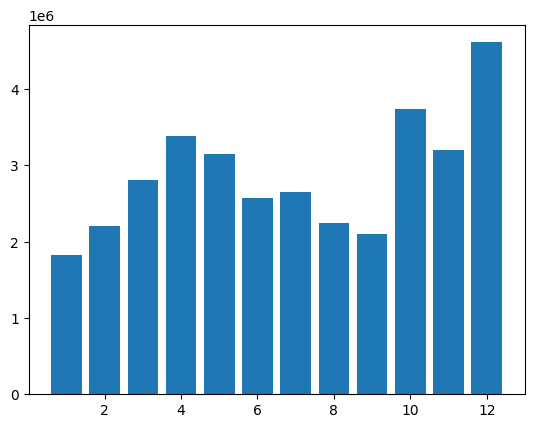

In [30]:
# plotting the sales 

import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, result['sales'])
plt.show()
